### Graph3

In [31]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [32]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [33]:
def first_func(state:AgentState)->AgentState:
    state["final"] = f"Hi,{state["name"]}"
    
    return state

def second_func(state:AgentState)->AgentState:
    state["final"] = state["final"]+f" your age is {state["age"]}"

    return state

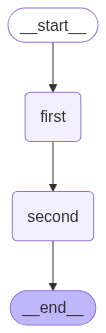

In [34]:
graph = StateGraph(AgentState)
graph.add_node("first",first_func)
graph.add_node("second",second_func)
graph.set_entry_point("first")
graph.set_finish_point("second")
graph.add_edge("first","second")
app = graph.compile()
app

In [35]:
res = app.invoke({"name":"Bob","age":18})
res["final"]

'Hi,Bob your age is 18'

### Graph3 HW

In [36]:
class HW_State(TypedDict):
    name:str
    age:int
    skills:List[str]
    result:str

In [41]:
def first_node(state:HW_State)->HW_State:
    """"""
    state["result"] = f"{state["name"]},welcome to the system!"
    return state

def second_node(state:HW_State)->HW_State:
    """"""
    state["result"] = state["result"] + f"You are {state["age"]} years old!"
    return state

def third_node(state:HW_State)->HW_State:
    """"""
    state["result"] = state["result"] + f"You have skill in:{",".join(state["skills"])}"
    return state

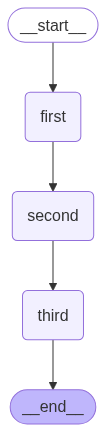

In [42]:
graph = StateGraph(HW_State)
graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.add_node("third",third_node)
graph.add_edge("first","second")
graph.add_edge("second","third")
graph.set_entry_point("first")
graph.set_finish_point("third")
app = graph.compile()
app

In [43]:
res = app.invoke({"name":"Bob","age":10,"skills":["table tennis","runnning","game"]})
res

{'name': 'Bob',
 'age': 10,
 'skills': ['table tennis', 'runnning', 'game'],
 'result': 'Bob,welcome to the system!You are 10 years old!You have skill in:table tennis,runnning,game'}

In [44]:
res["result"]

'Bob,welcome to the system!You are 10 years old!You have skill in:table tennis,runnning,game'